In [1]:
%matplotlib inline

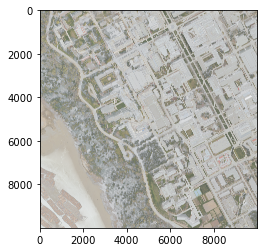

In [2]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np

im = Image.open('../data/481E_5456N.tif', 'r')
imshow((np.asarray(im)))


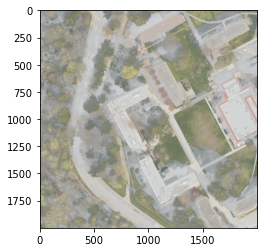

In [3]:
tmp = np.asarray(im)
imshow(tmp[0:2000:1, 0:2000:1])

In [4]:
# type(im)
im.getbands()

('R', 'G', 'B', 'X')

In [47]:
class Threshing:
    def __init__(self, size, dimension):
        self.size = size
        self.dimension = dimension
    # @brief: threshing a 100 X 100 matrix
    # @return precent of green. 
    def green_threshing(self, matrix):
        # (<120, >130, <153)
        matrix_1d = matrix.reshape((self.dimension*self.dimension, 4))
        matrix_list = matrix_1d.tolist()
        sum = 0
        for i in matrix_list:
            if i[0] < 100 and i[1] > 60 and i[2] < 100:
                sum += 1
        return sum / (self.dimension*self.dimension)

    def get_heat_map(self):
        thresh = np.zeros((self.size, self.size))
        for i in np.arange(self.size):
            for j in np.arange(self.size):
                thresh[i, j] = self.green_threshing(tmp[i*self.dimension:(i+1)*self.dimension:1,j*self.dimension:(j+1)*self.dimension:1])
        return thresh


In [48]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def show_heat_map(thresh):
    harvest = np.around(thresh, decimals=2)

    fig, ax = plt.subplots()
    im = ax.imshow(harvest)

    fig.tight_layout()
    plt.show()

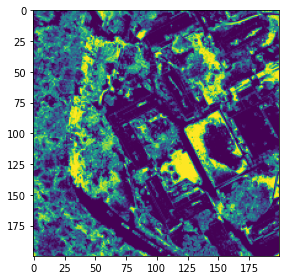

In [49]:
# testing tile to make sure the color thresh is reasonable
show_heat_map(Threshing(200, 10).get_heat_map())

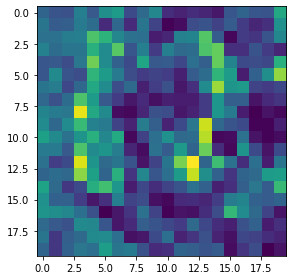

In [50]:
show_heat_map(Threshing(20, 100).get_heat_map())

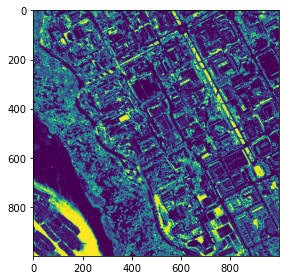

In [55]:
# 1 m X 1m heatmap of the tile
show_heat_map(Threshing(1000, 10).get_heat_map())

In [58]:
%timeit -n1 Threshing(1000, 10).get_heat_map()

23.6 s ± 1.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


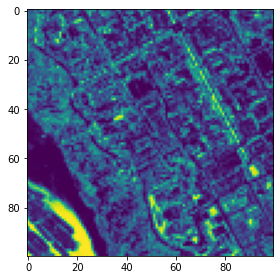

In [57]:
# 10 m X 10m heatmap of the tile
show_heat_map(Threshing(100, 100).get_heat_map())